In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import random

In [135]:
# A，Rho，C, Table_name,如
O_O = [2404      ,  5.43645, 10.58, 'O_O']
Si_O =[4002.9050,  0.15817, 4081, 'O2-Si4+']
Si_Si =[-1        ,        0,      0,'Si4+Si4+']

In [137]:
all_data = [O_O,Si_O,Si_Si]

In [139]:
# 输出文件位置
file_path = r'C:\Users\81004\Desktop\Table\TABLE-pair1'
# 精度
#######
Number_of_Grids = 10000
Minimum_Cutoff = 0.001
Maximum_Cutoff = 10.00

In [141]:
r_range = np.linspace(Minimum_Cutoff,Maximum_Cutoff,Number_of_Grids)

In [143]:
class ElementPairPotential:
    def __init__(self, pair, A=None, rho=None, C=None, B=None, D=None, n=None, r0=None, charge1=None, charge2=None):
        """
        初始化每个元素对的势函数参数

        Args:
        - pair (str): 元素对名称，例如 "B-O" 或 "O-O"
        - A (float): Buckingham 势的指数项前因子 (eV)
        - rho (float): Buckingham 势的距离参数 (Å)
        - C (float): Buckingham 势的色散项 (eV·Å⁶)
        - B (float): 修正势的幂项前因子 (eV·Åⁿ)
        - D (float): 修正势的平方项前因子 (eV/Å²)
        - n (float): 修正势的幂指数
        - r0 (float): 拼接点 (Å)
        - charge1 (float): 原子 1 的电荷 (单位: e)
        - charge2 (float): 原子 2 的电荷 (单位: e)
        """
        self.pair = pair
        self.A = A
        self.rho = rho
        self.C = C
        self.B = B
        self.D = D
        self.n = n
        self.r0 = r0
        self.charge1 = charge1
        self.charge2 = charge2

    def print_parameters(self):
        """打印参数"""
        print(f"Pair: {self.pair}")
        print(f"  A = {self.A}, rho = {self.rho}, C = {self.C}")
        print(f"  B = {self.B}, D = {self.D}, n = {self.n}, r0 = {self.r0},")
        print(f"  charge1 = {self.charge1}, charge2 = {self.charge2}\n")

In [145]:
origin_SiO_class = ElementPairPotential(['Si','O'],13702.9050,0.193817,54.681,
                                28.950, -3.059,3.932,1.168,
                                 1.2,1.2)

In [147]:
# 定义元素对的参数
class_Si_O = ElementPairPotential(
    pair="Si-O",
    A=Si_O[0],
    rho=Si_O[1],
    C=Si_O[2],
)

class_O_O = ElementPairPotential(
    pair="O-O",
    A=O_O[0],
    rho=O_O[1],
    C=O_O[2],
)
class_O_O.print_parameters()
class_Si_O.print_parameters()

Pair: O-O
  A = 2404, rho = 5.43645, C = 10.58
  B = None, D = None, n = None, r0 = None,
  charge1 = None, charge2 = None

Pair: Si-O
  A = 4002.905, rho = 0.15817, C = 4081
  B = None, D = None, n = None, r0 = None,
  charge1 = None, charge2 = None



In [167]:

# 定义方程函数，a、r、c作为输入参数
def dev_equation(r, A, rho, C):
    return -A / rho * np.exp(-r / rho) + 6 * C / r**7

# 使用 fsolve 求解方程
def get_r0(para_class, initial_guess=1.0):
    A, rho, C = para_class.A,para_class.rho,para_class.C
    # 求解方程
    r_solution = fsolve(dev_equation, initial_guess, args=(A, rho, C))
    return r_solution[0]

r_0 = get_r0(class_Si_O)

print(f"方程的解为 r = {r_value}")


方程的解为 r = 1.45403172201423


C:\Users\81004\AppData\Local\Temp\ipykernel_15168\1197706074.py:9: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  r_solution = fsolve(dev_equation, initial_guess, args=(A, rho, C))


In [165]:
def force_equation(r,r0,para_class):
    A, rho, C = para_class.A,para_class.rho,para_class.C
    force = None
    if r>r0:
        force = dev_equation(r, A, rho, C)
    else:
        force = -devq_equation(r, A, rho, C)
    return force

In [153]:
dev_1 = []
for i in  r_range:
    temp = force_equation(i, r_0, origin_SiO_class)
    dev_1.append(temp)
plt.plot(r_range,dev_1)
plt.ylim(-1e2,1e2)

NameError: name 'devq_equation' is not defined

In [157]:
# 定义原始势函数形式
def long_potential(r, para_class):
    A, rho, C= para_class.A,para_class.rho,para_class.C
    bkh = A * np.exp(-r / rho) - C / r**6
    return bkh

def short_potential(r,r0, para_class):
    A, rho, C= para_class.A,para_class.rho,para_class.C
    bkh = A * np.exp(-r / rho) - C / r**6
    return -bkh+2*long_potential(r0, para_class)

def Teter_potential(r,r0, para_class):
    A, rho, C= para_class.A,para_class.rho,para_class.C
    res = None
    if r<r0:
        res = short_potential(r,r0, para_class)
    else:
        res = long_potential(r, para_class)
    return res

In [159]:
dev_1 = []
for i in  r_range:
    temp = Teter_potential(i, r_0, try)
    dev_1.append(temp)

(-10.0, 100.0)

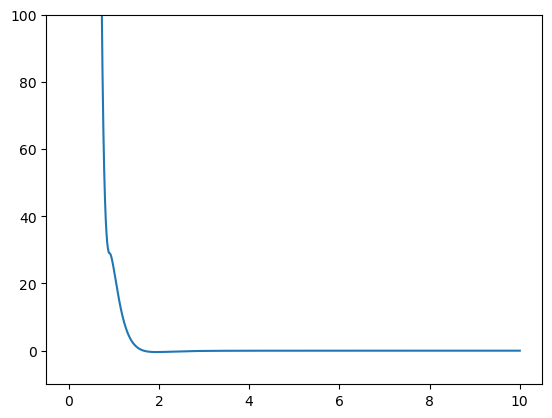

In [161]:
plt.plot(r_range,dev_1)
plt.ylim(-1e1,1e2)

In [36]:
for i in all_data:
    

-1.0936199999999995e+20

C:\Users\81004\AppData\Local\Temp\ipykernel_15168\143708742.py:11: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  r_solution = fsolve(equation, initial_guess, args=(A, rho, C))
C:\Users\81004\AppData\Local\Temp\ipykernel_15168\143708742.py:11: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  r_solution = fsolve(equation, initial_guess, args=(A, rho, C))
C:\Users\81004\AppData\Local\Temp\ipykernel_15168\143708742.py:11: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  r_solution = fsolve(equation, initial_guess, args=(A, rho, C))


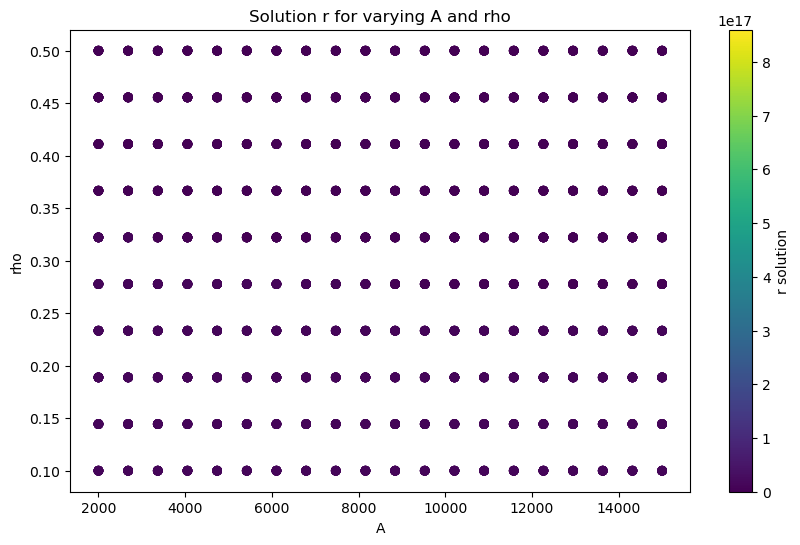

In [129]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# 定义方程
def equation(r, A, rho, C):
    return -A / rho * np.exp(-r / rho) + 6 * C / r**7

# 求解方程的函数
def solve_equation(A, rho, C, initial_guess=1.0):
    r_solution = fsolve(equation, initial_guess, args=(A, rho, C))
    return r_solution[0]

# 定义参数范围
A_values = np.linspace(2000, 15000, 20)  # A从2000到15000，分成20个点
rho_values = np.linspace(0.1, 0.5, 10)  # rho从0.1到0.5，分成10个点
C_values = np.linspace(10, 500, 10)  # C从10到500，分成10个点

# 存储解的结果
r_solutions = []

# 遍历所有的参数组合，计算解
for A in A_values:
    for rho in rho_values:
        for C in C_values:
            r_value = solve_equation(A, rho, C)
            r_solutions.append((A, rho, C, r_value))

# 将解结果转换为数组以便可视化
r_solutions = np.array(r_solutions)

# 可视化：绘制解与A, rho, C之间的关系
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
scatter = ax.scatter(r_solutions[:, 0], r_solutions[:, 1], c=r_solutions[:, 3], cmap='viridis')
ax.set_xlabel('A')
ax.set_ylabel('rho')
ax.set_title('Solution r for varying A and rho')
fig.colorbar(scatter, label='r solution')
plt.show()


C:\Users\81004\AppData\Local\Temp\ipykernel_15168\1925882910.py:11: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  r_solution = fsolve(equation, initial_guess, args=(A, rho, C))
C:\Users\81004\AppData\Local\Temp\ipykernel_15168\1925882910.py:11: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  r_solution = fsolve(equation, initial_guess, args=(A, rho, C))
C:\Users\81004\AppData\Local\Temp\ipykernel_15168\1925882910.py:11: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  r_solution = fsolve(equation, initial_guess, args=(A, rho, C))


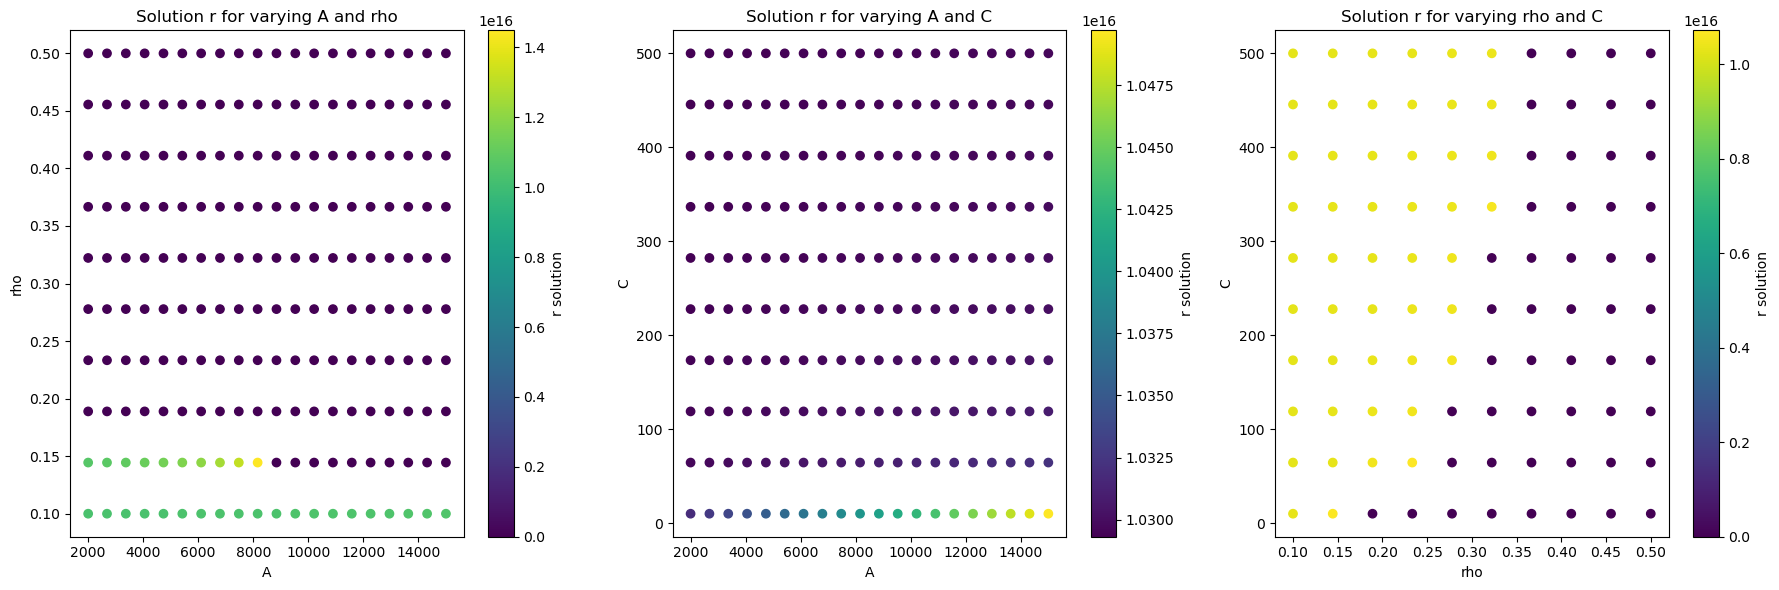

In [133]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# 定义方程
def equation(r, A, rho, C):
    return -A / rho * np.exp(-r / rho) + 6 * C / r**7

# 求解方程的函数
def solve_equation(A, rho, C, initial_guess=1.0):
    r_solution = fsolve(equation, initial_guess, args=(A, rho, C))
    return r_solution[0]

# 定义参数范围
A_values = np.linspace(2000, 15000, 20)  # A从2000到15000，分成20个点
rho_values = np.linspace(0.1, 0.5, 10)  # rho从0.1到0.5，分成10个点
C_values = np.linspace(10, 500, 10)  # C从10到500，分成10个点

# 存储解的结果
r_solutions_A_rho = []
r_solutions_A_C = []
r_solutions_rho_C = []

# 遍历参数组合，计算解
for A in A_values:
    for rho in rho_values:
        r_value = solve_equation(A, rho, C_values[0])  # 固定C，计算A和rho的影响
        r_solutions_A_rho.append((A, rho, r_value))

for A in A_values:
    for C in C_values:
        r_value = solve_equation(A, rho_values[0], C)  # 固定rho，计算A和C的影响
        r_solutions_A_C.append((A, C, r_value))

for rho in rho_values:
    for C in C_values:
        r_value = solve_equation(A_values[0], rho, C)  # 固定A，计算rho和C的影响
        r_solutions_rho_C.append((rho, C, r_value))

# 将结果转换为数组，便于可视化
r_solutions_A_rho = np.array(r_solutions_A_rho)
r_solutions_A_C = np.array(r_solutions_A_C)
r_solutions_rho_C = np.array(r_solutions_rho_C)

# 创建子图，绘制3个二维图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 绘制 A 和 rho 的关系
scatter_A_rho = axes[0].scatter(r_solutions_A_rho[:, 0], r_solutions_A_rho[:, 1], c=r_solutions_A_rho[:, 2], cmap='viridis')
axes[0].set_xlabel('A')
axes[0].set_ylabel('rho')
axes[0].set_title('Solution r for varying A and rho')
fig.colorbar(scatter_A_rho, ax=axes[0], label='r solution')

# 绘制 A 和 C 的关系
scatter_A_C = axes[1].scatter(r_solutions_A_C[:, 0], r_solutions_A_C[:, 1], c=r_solutions_A_C[:, 2], cmap='viridis')
axes[1].set_xlabel('A')
axes[1].set_ylabel('C')
axes[1].set_title('Solution r for varying A and C')
fig.colorbar(scatter_A_C, ax=axes[1], label='r solution')

# 绘制 rho 和 C 的关系
scatter_rho_C = axes[2].scatter(r_solutions_rho_C[:, 0], r_solutions_rho_C[:, 1], c=r_solutions_rho_C[:, 2], cmap='viridis')
axes[2].set_xlabel('rho')
axes[2].set_ylabel('C')
axes[2].set_title('Solution r for varying rho and C')
fig.colorbar(scatter_rho_C, ax=axes[2], label='r solution')

plt.tight_layout()
plt.show()


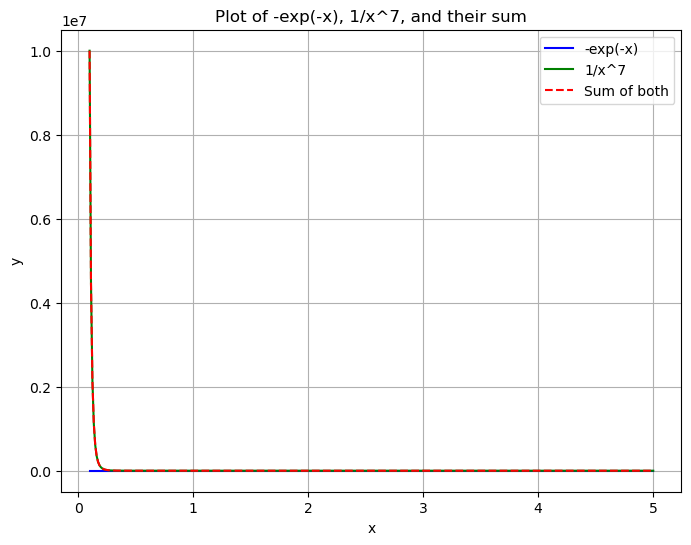

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def func1(x):
    return -np.exp(-x)

def func2(x):
    return 1 / x**7

# 定义x的范围，避免x=0导致的除零错误
x = np.linspace(0.1, 5, 400)

# 计算函数值
y1 = func1(x)
y2 = func2(x)
y_sum = y1 + y2

# 绘制图形
plt.figure(figsize=(8, 6))

# 绘制三个函数
plt.plot(x, y1, label='-exp(-x)', color='blue')
plt.plot(x, y2, label='1/x^7', color='green')
plt.plot(x, y_sum, label='Sum of both', color='red', linestyle='--')

# 添加标题和标签
plt.title('Plot of -exp(-x), 1/x^7, and their sum')
plt.xlabel('x')
plt.ylabel('y')

# 显示图例
plt.legend()

# 显示图形
plt.grid(True)
plt.show()
